# Notebook for Cut Face Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
from scipy.stats import norm

import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

In [2]:
viridis = cm.get_cmap('viridis', 10)

In [3]:
Cutface_specimens = pd.read_csv('../../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

## Plot directions

In [4]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [5]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 359.3140071973992,
 'inc': 67.19770761735734,
 'n': 109,
 'r': 106.65359727244838,
 'k': 46.02790421774432,
 'alpha95': 2.0157272974389002,
 'csd': 11.93917776476927}

In [6]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 286.49699313337345,
 'inc': 42.003560540334476,
 'n': 167,
 'r': 163.55867702232504,
 'k': 48.23726255190197,
 'alpha95': 1.5861242493209464,
 'csd': 11.662554654251615}

In [7]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 286.57662835036626,
 'inc': 29.430252935780295,
 'n': 157,
 'r': 152.63958083558612,
 'k': 35.77637702199419,
 'alpha95': 1.9070660543868,
 'csd': 13.542125665843008}

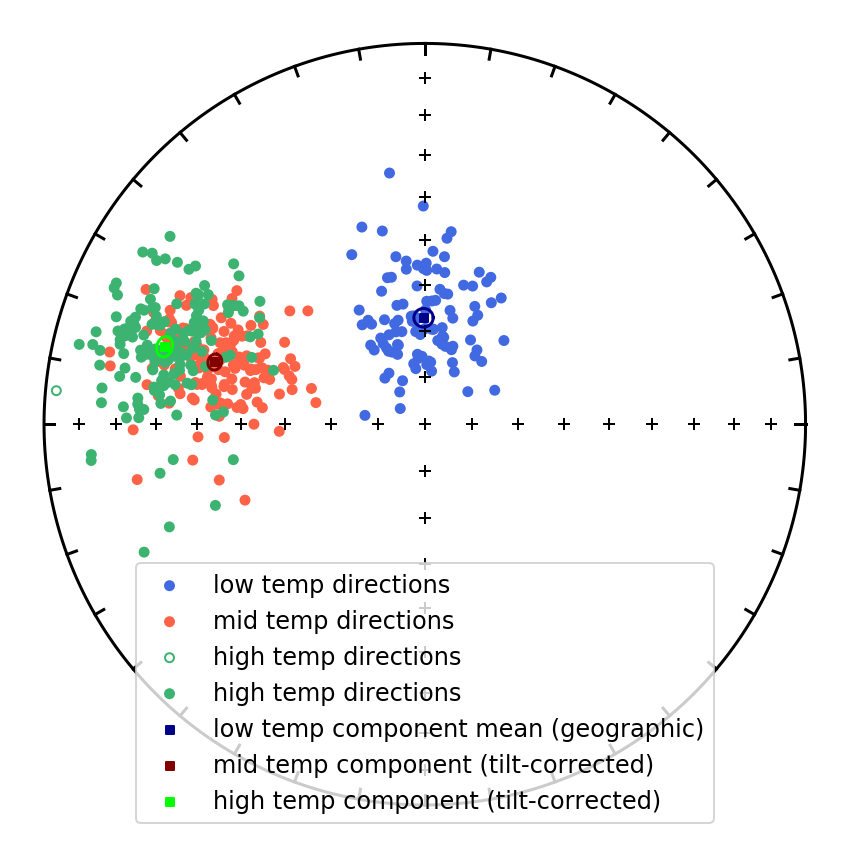

In [8]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='royalblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='maroon', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='lime', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=12)
plt.savefig('../code_output/specimen_directions.pdf')
plt.show()

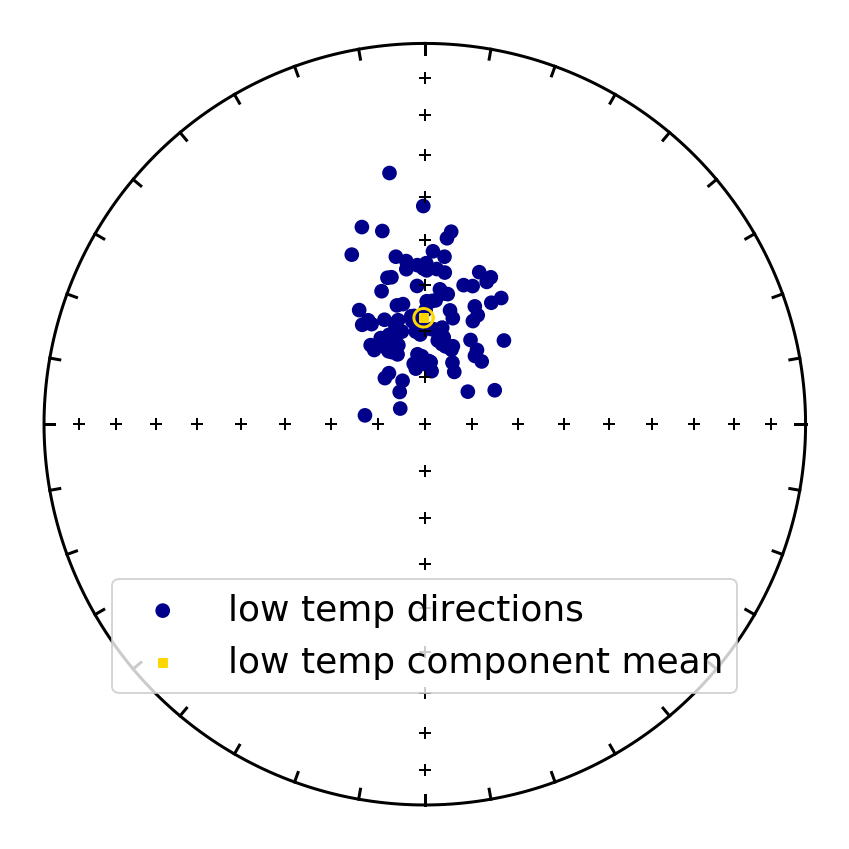

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='darkblue',label='low temp directions', markersize=40)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='gold', marker = 's', label='low temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
plt.savefig('../code_output/specimen_directions_lt.pdf',transparent=True)
plt.show()

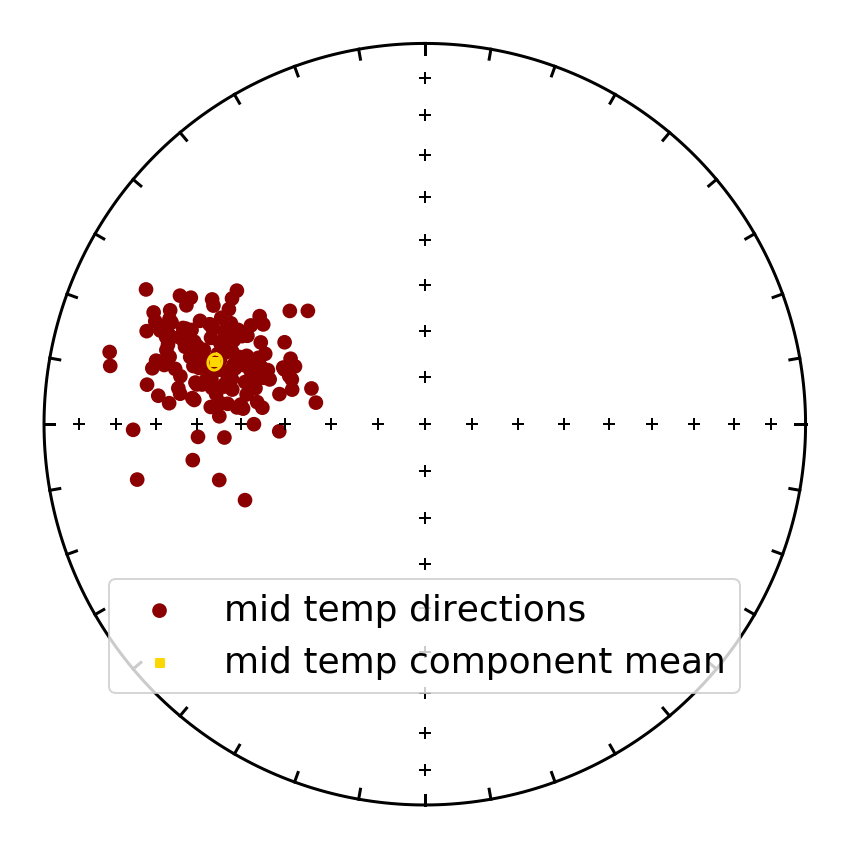

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='darkred',label='mid temp directions',markersize=40)

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                    color='gold', marker = 's', label='mid temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
plt.savefig('../code_output/specimen_directions_mt.pdf',transparent=True)
plt.show()

In [11]:
specimens_ht_tc_above_0=specimens_ht_tc[specimens_ht_tc['dir_inc']<0]
specimens_ht_tc_below_0=specimens_ht_tc[specimens_ht_tc['dir_inc']>0]
specimens_ht_tc_above_0

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
310,CF-134a,CF-134a_LP-DIR-T,CF-134,NaN,ht,275.2,-3.2,3.0,10.0,100.0,3.5,9.7,960.0,937.0,K,NaN,hargrave 2021-02-13 19:30:03,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cut Face Creek,CF


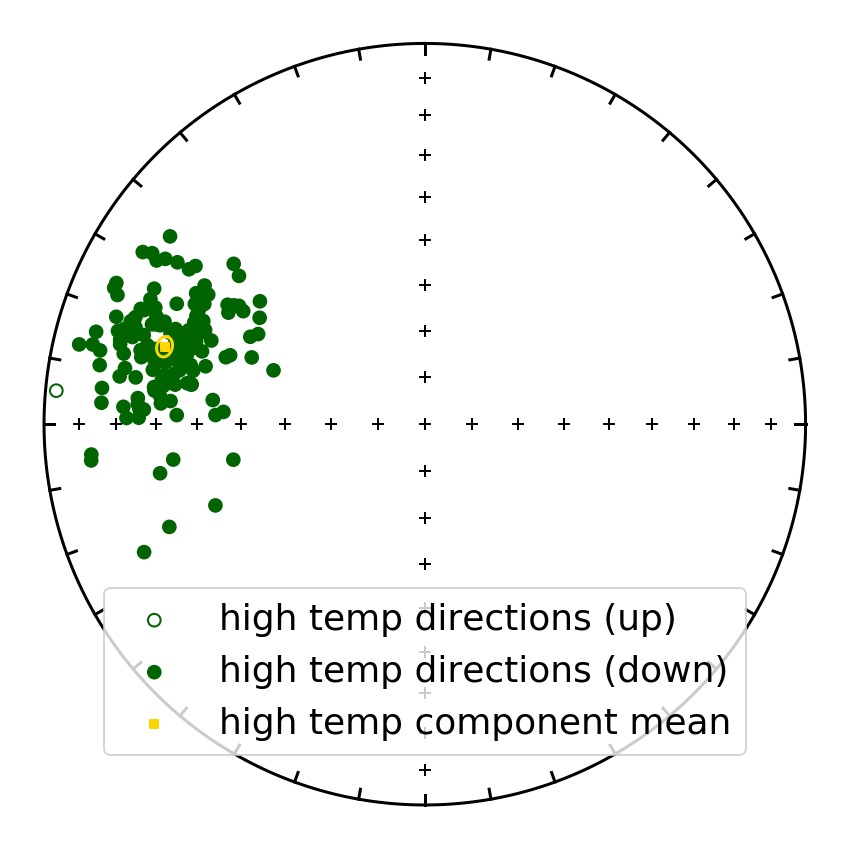

In [12]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_ht_tc_above_0['dir_dec'].tolist(),specimens_ht_tc_above_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (up)',markersize=40)
ipmag.plot_di(specimens_ht_tc_below_0['dir_dec'].tolist(),specimens_ht_tc_below_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (down)',markersize=40)

ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='gold', marker = 's', label='high temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.075),fontsize=18)
plt.savefig('../code_output/specimen_directions_ht.pdf',transparent=True)
plt.show()

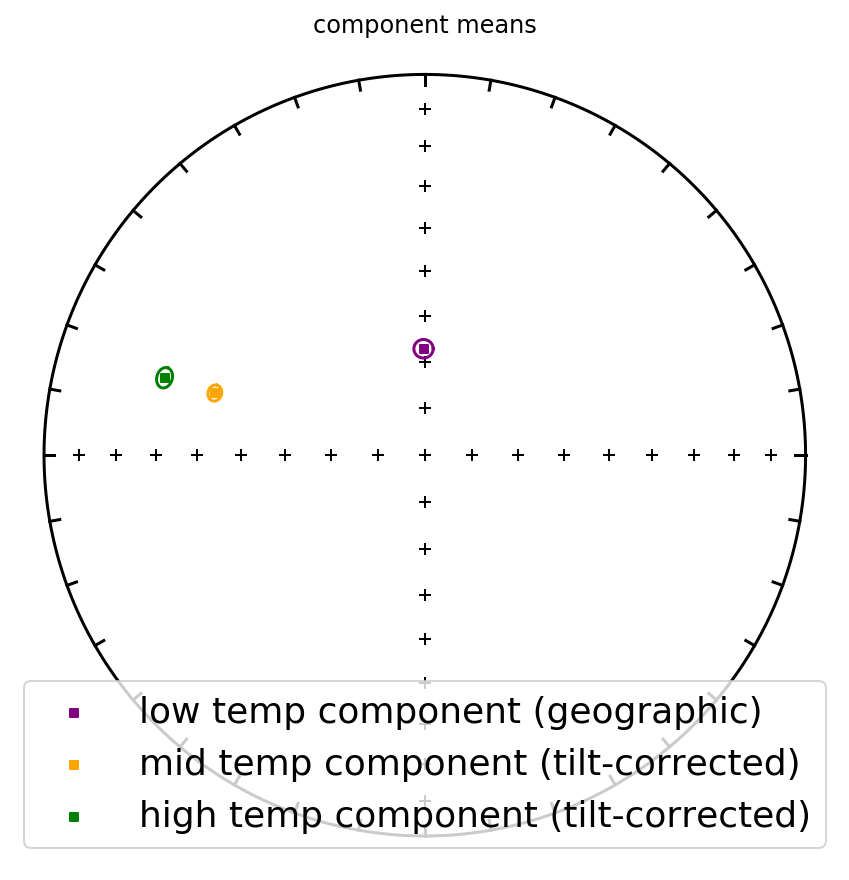

In [13]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=18)
plt.title('component means')
plt.show()

## Plot IGRF, dipole, CF, and NSVG together

### Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [14]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)
local_igrf

array([  357.5029463624409 ,    73.03790699273897, 50872.59445578779   ])

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [15]:
NSVG_pole_lat = 31.1 
NSVG_pole_lon = 181.7
NSVG_A95 = 4.2

# calculated expected dec, inc at the location of Cut Face Creek based on NSVG NE mean pole position
NSVG_dec, NSVG_inc = pmag.vgp_di(NSVG_pole_lat,NSVG_pole_lon,Cutface_lat, Cutface_lon)
NSVG_dec, NSVG_inc

(290.7248681709183, 41.43279095168165)

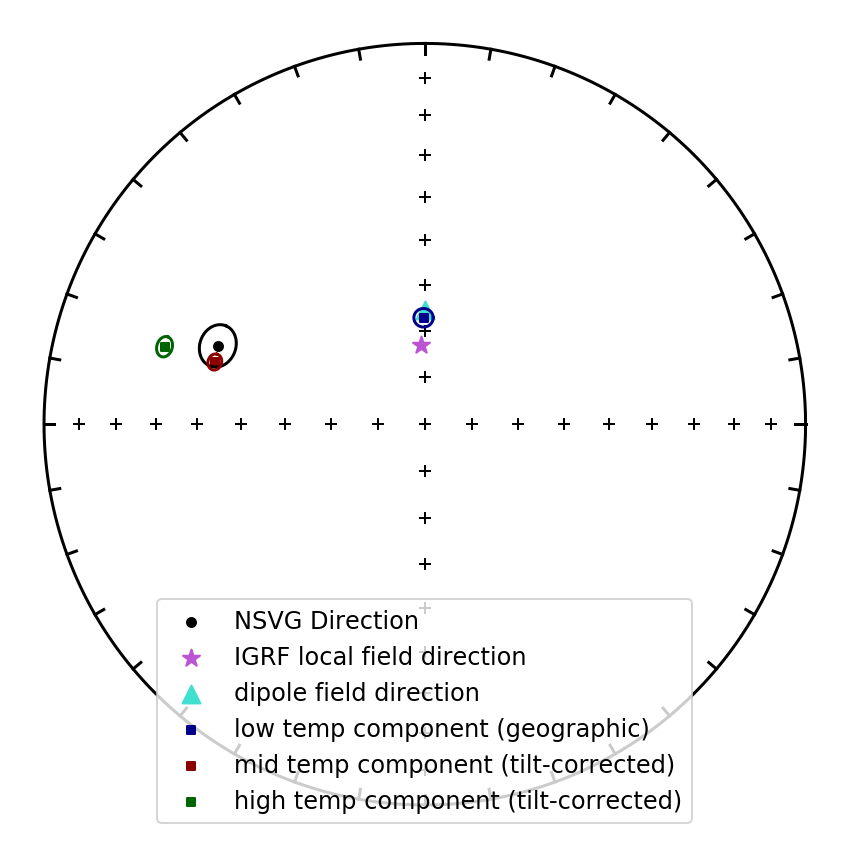

In [16]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction a95
ipmag.plot_di([local_igrf_dec],[local_igrf_inc], marker = '*', label='IGRF local field direction', markersize=80, color='mediumorchid')
ipmag.plot_di([local_dipole_dec],[local_dipole_inc], marker = '^',label='dipole field direction',markersize=80, color='turquoise')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=12)
cf_igrf_nsvg_stereonet.savefig('../code_output/cf_igrf_nsvg_stereonet.pdf', bbox_inches='tight')
plt.show()

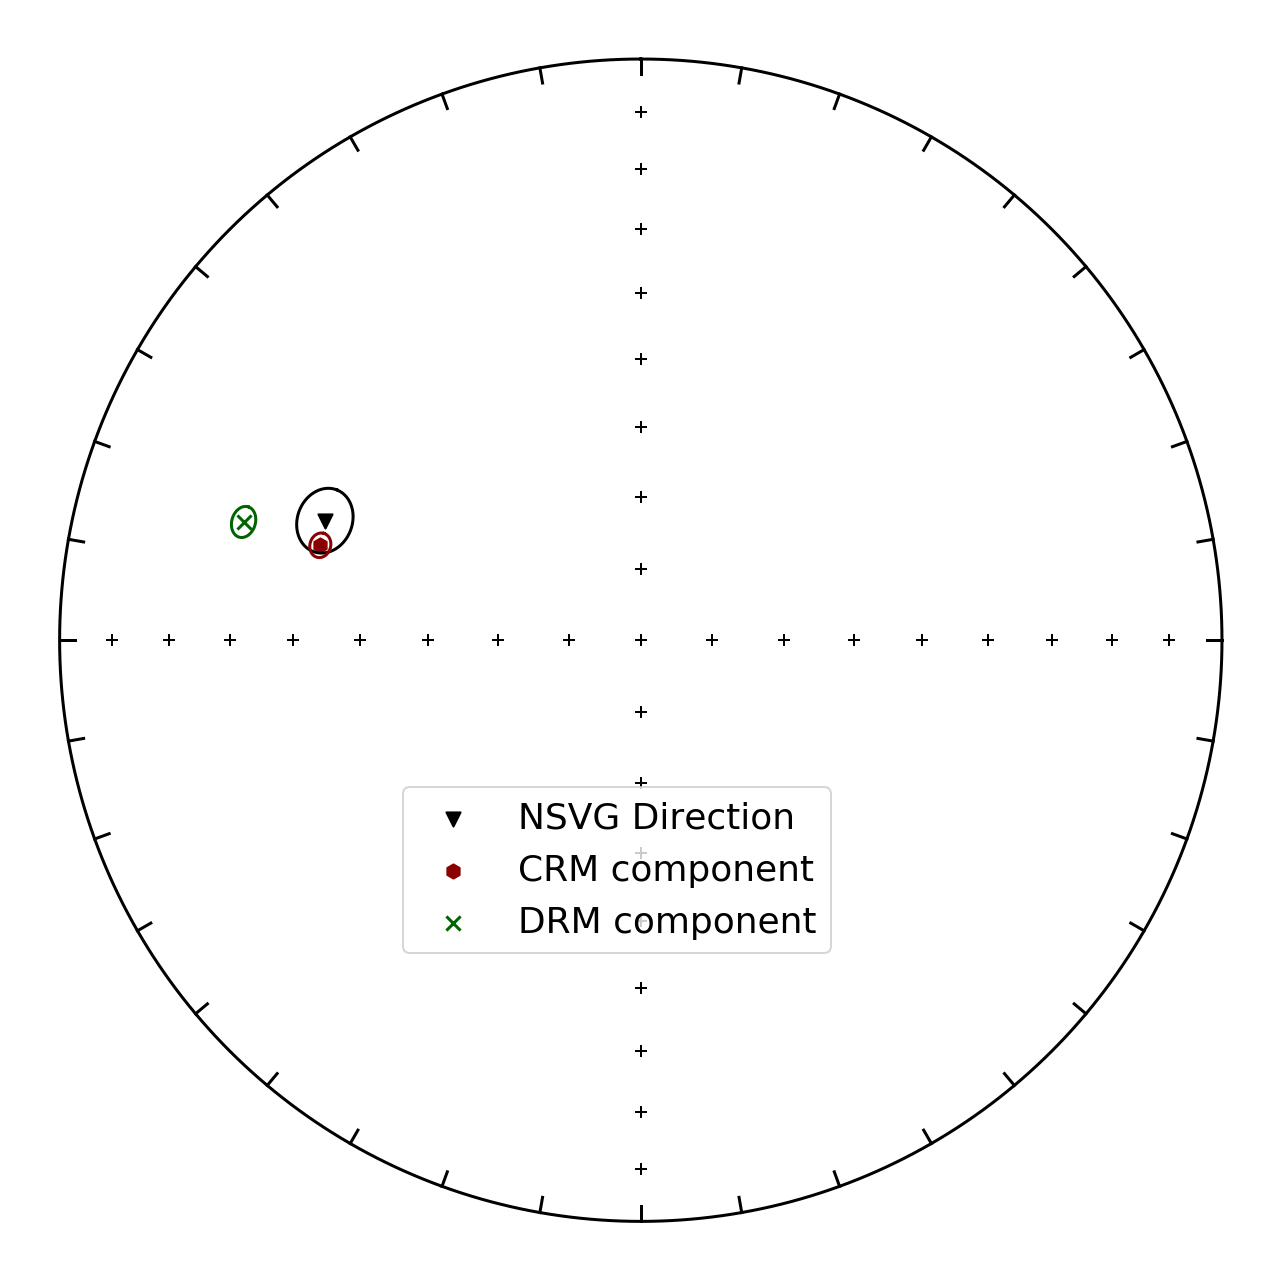

In [79]:
cf_results_stereonet=plt.figure(num=fignum,figsize=(9,9))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction',color= 'k',marker='v',markersize=50) #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color= 'darkred', marker = 'h', label='CRM component',markersize=50)
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 'x', label='DRM component',markersize=50)

#unsquish_label = 'high temp component (f=' + str(np.round(best_f_mt,3)) +  ' corrected)'
#ipmag.plot_di_mean(ht_mean_NSVG_unsquish['dec'],ht_mean_NSVG_unsquish['inc'],ht_mean_NSVG_unsquish['alpha95'],
                   #color='mediumseagreen', marker = '^', label=unsquish_label)
plt.legend(loc=[.31,.25],fontsize=18)
cf_results_stereonet.savefig('../code_output/cf_results_stereonet.pdf', bbox_inches='tight',transparent=True)


plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [17]:
f_factor_ht_mt = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc'])),2)
f_factor_ht_mt

0.63

In [18]:
f_factor_ht_NSVG = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(41.4)), 2)
f_factor_ht_NSVG

0.64

**We need to progressive unflattening the ht directions and conduct common mean tests with the population of NSVG NE directions to determine the range of f factors.**

In [19]:
ht_incs_NSVG_unsquish = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(), .607)
# calculate mean direction of high temp component after unsquishing
ht_mean_NSVG_unsquish = ipmag.fisher_mean(dec=specimens_ht_tc['dir_dec'].tolist(), inc=ht_incs_NSVG_unsquish)

## plot local volcanic directions

In [20]:
ghb_tp_specimens = pd.read_csv('../../data/Pmag/GHB_TP/specimens.txt', sep='\t', header=1)
ghb_tp_specimens_mt_geo = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==0)]
ghb_tp_specimens_mt_tc = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==100)]

In [21]:
ghb_tp_specimens_GH1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH1']
ghb_tp_specimens_GH2 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH2']
ghb_tp_specimens_TP1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='TP1']

In [22]:
GH1_mean = ipmag.fisher_mean(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist())
GH2_mean = ipmag.fisher_mean(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist())
TP1_mean = ipmag.fisher_mean(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist())

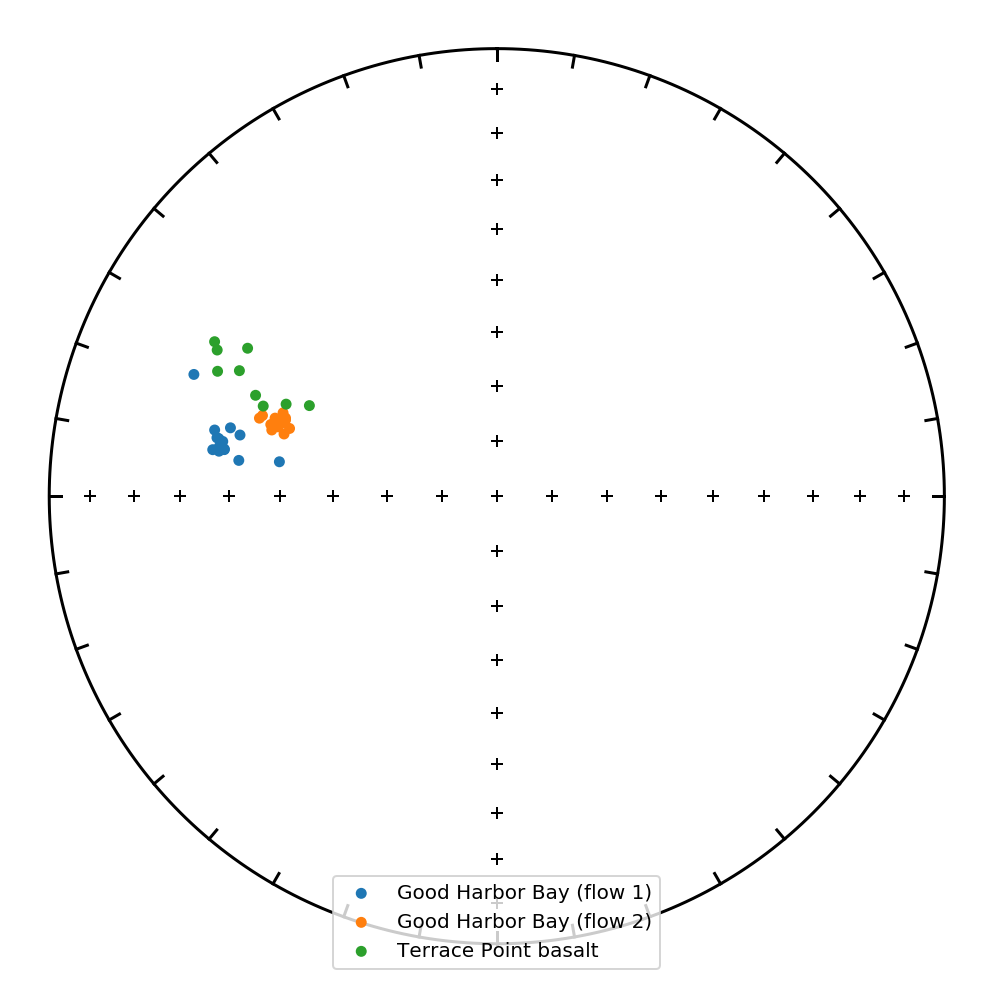

In [23]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist(),color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist(),color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist(),color='C2',label='Terrace Point basalt')

plt.legend(loc=8)
plt.show()

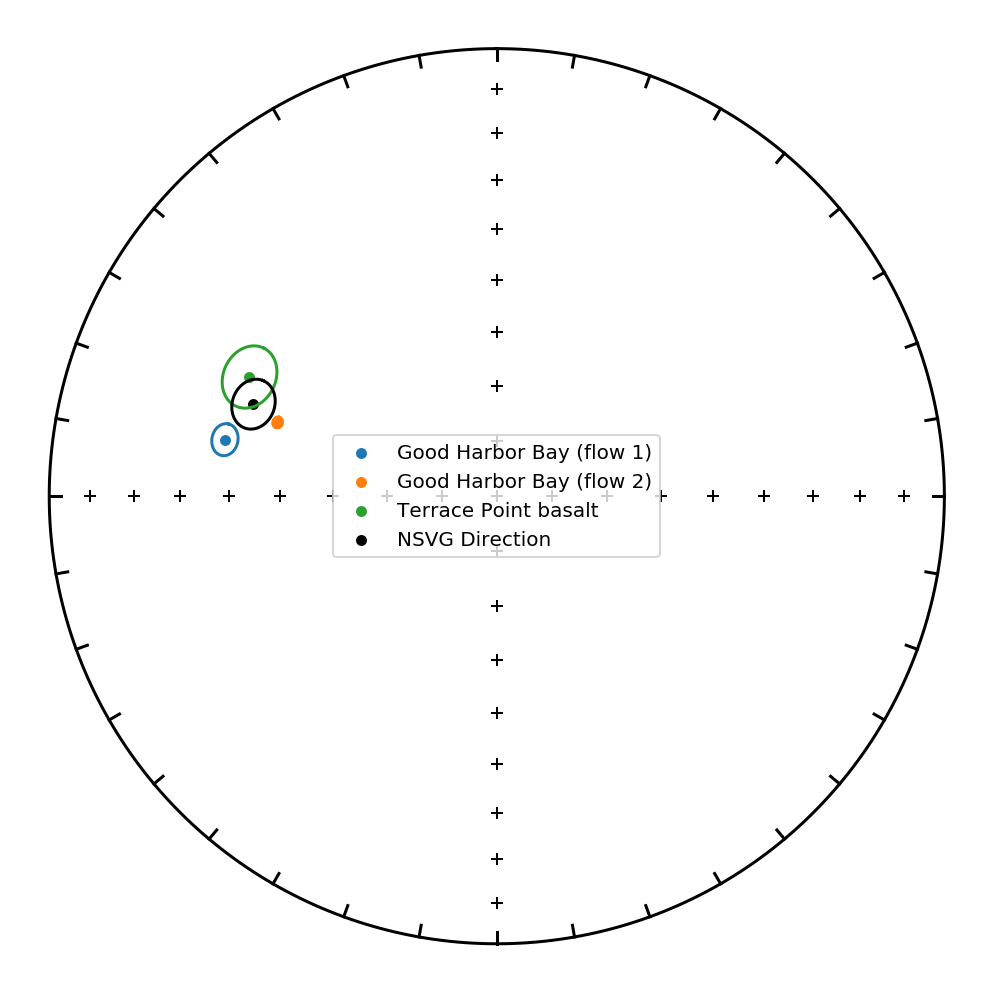

In [24]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(GH1_mean['dec'],GH1_mean['inc'],GH1_mean['alpha95'],color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di_mean(GH2_mean['dec'],GH2_mean['inc'],GH2_mean['alpha95'],color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di_mean(TP1_mean['dec'],TP1_mean['inc'],TP1_mean['alpha95'],color='C2',label='Terrace Point basalt')
ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') 

plt.legend(loc=10)
plt.show()

## Implement the TK03 E/I method

In [25]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 29.43

The corrected inclination is: 40.74
with bootstrapped confidence bounds of: 33.57 to 48.43
and elongation parameter of: 1.93
The flattening factor is: 0.64
with bootstrapped confidence bounds of: 0.85 to 0.5


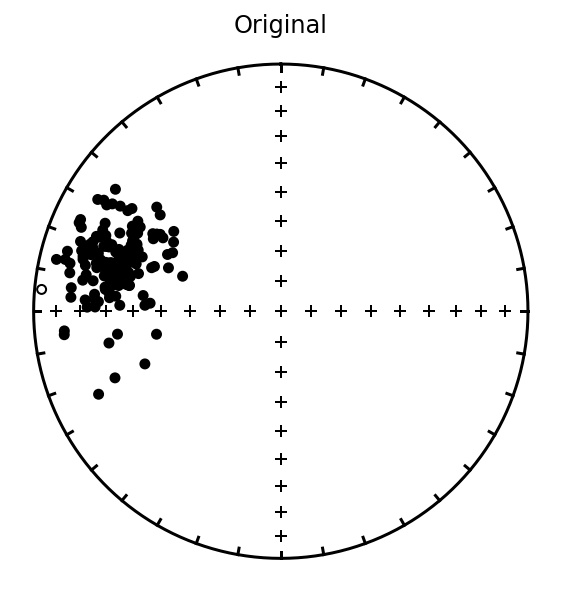

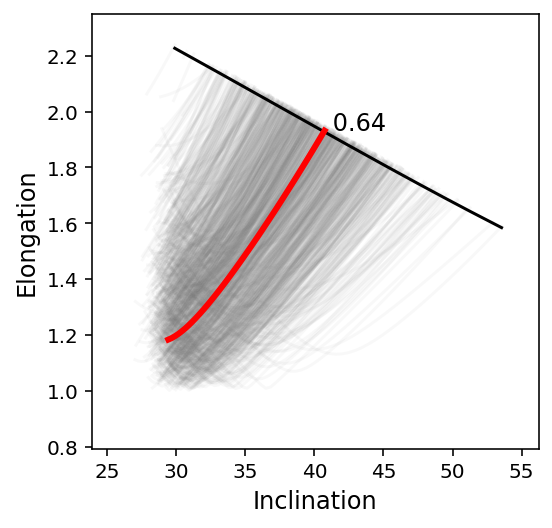

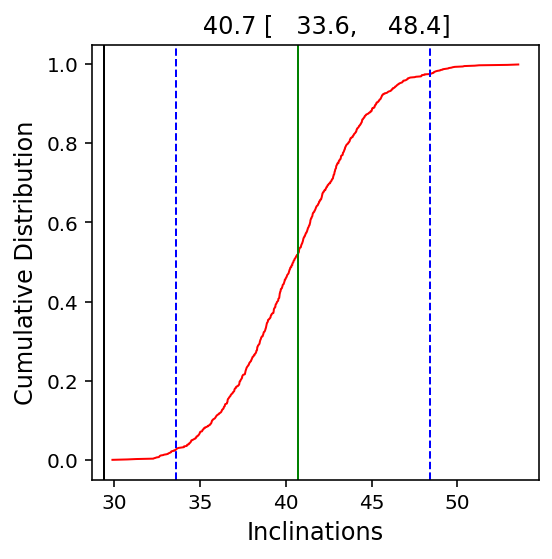

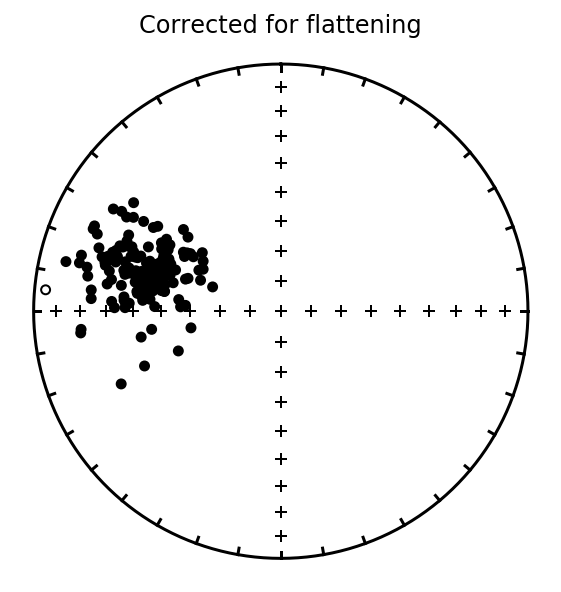

In [26]:
EI_incs, EI_elongs, EI_fs = ipmag.find_ei(np.array(ht_tc_di_block),save=0,save_folder='./../code_output',return_values=True, fmt='png')

In [27]:
np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)

array([0.51, 0.85])

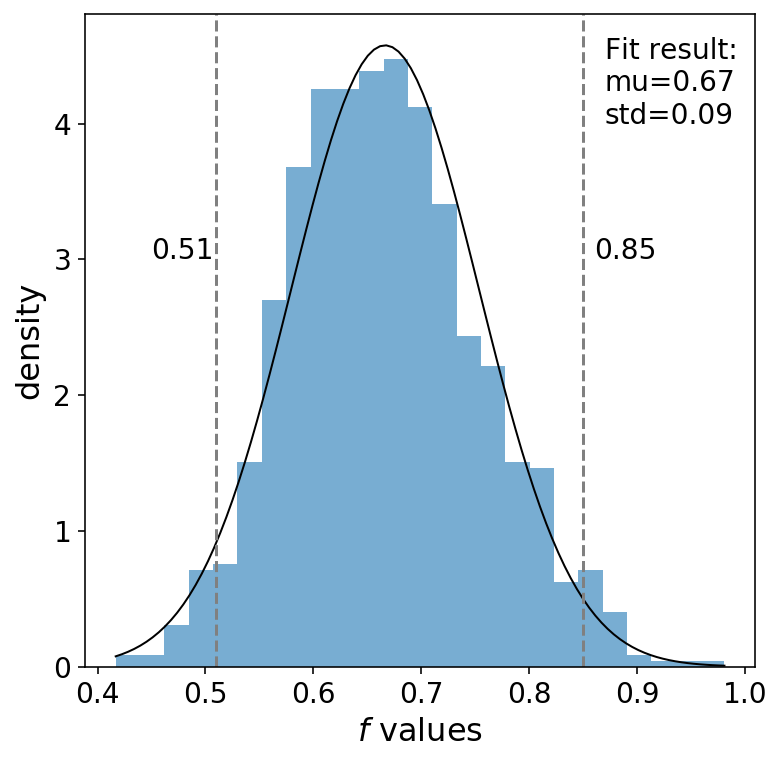

In [29]:
lower, upper = np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)
mu, std = norm.fit(EI_fs)
x = np.linspace(min(EI_fs), max(EI_fs), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(EI_fs, bins=25, alpha=0.6, density=1)
# plt.title('All $f$ factors from bootstrap $E/I$ result', fontsize=14)
plt.plot(x, p, 'k', linewidth=1)

plt.text(0.87, 4, 'Fit result:\nmu='+str(round(mu,2))+'\nstd='+str(round(std, 2)), fontsize=14)

plt.axvline(x=lower, color = 'gray', ls='--')
plt.axvline(x=upper, color = 'gray', ls='--')

plt.text(0.45, 3, str(lower), fontsize=14)
plt.text(0.86, 3, str(upper), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$f$ values', fontsize=16)
plt.ylabel('density', fontsize=16)

# plt.savefig('../code_output/EI_f_histogram.pdf', bbox_inches='tight')
plt.show()

## common mean test between f=0.50 and f=0.85 (the 95% bounds from result of E/I method)

In [30]:
original_dir_blocks = specimens_ht_tc[['dir_dec', 'dir_inc']].to_numpy()
dir_blocks_50 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], 0.50)]).T
dir_blocks_85 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], 0.85)]).T

dir_blocks_50_mean = ipmag.fisher_mean(di_block=dir_blocks_50)
dir_blocks_85_mean = ipmag.fisher_mean(di_block=dir_blocks_85)

dir_blocks_50_pole = pmag.dia_vgp(dir_blocks_50_mean['dec'], dir_blocks_50_mean['inc'], dir_blocks_50_mean['alpha95'], Cutface_lat, Cutface_lon)
dir_blocks_85_pole = pmag.dia_vgp(dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc'], dir_blocks_85_mean['alpha95'], Cutface_lat, Cutface_lon)

In [31]:
# angle between poles corrected by 95% bounds of f values
np.round(pmag.angle(dir_blocks_50_pole, dir_blocks_85_pole),1)

array([10.1])

In [32]:
ipmag.common_mean_watson(dir_blocks_50, dir_blocks_85)

Results of Watson V test: 

Watson's V:           150.6
Critical value of V:  6.2
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 13.8
Critical angle for M&M1990:   2.8



(0, 13.807726364947463, 2.8105698368106706)

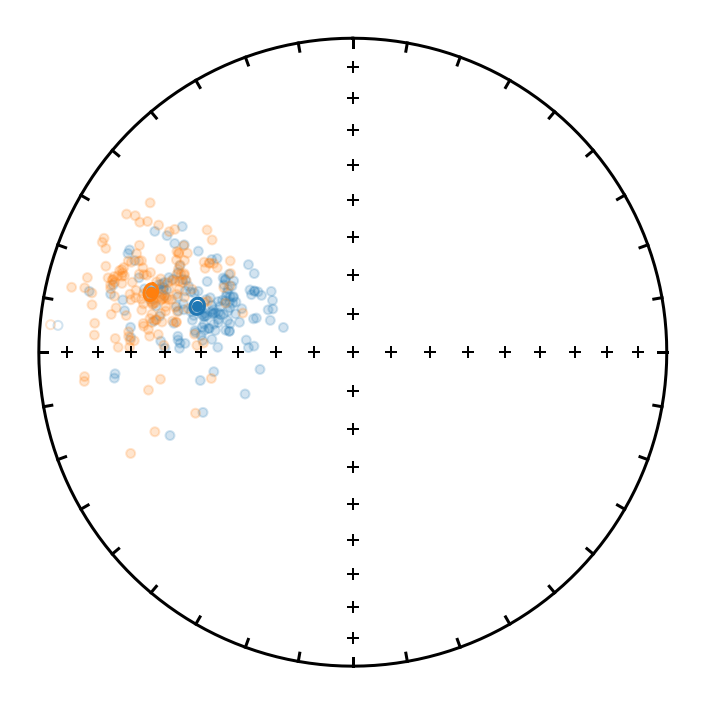

In [33]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(dir_blocks_50.T[0], dir_blocks_50.T[1], color='C0', alpha=0.2)
ipmag.plot_di(dir_blocks_85.T[0], dir_blocks_85.T[1], color='C1', alpha=0.2)

ipmag.plot_di_mean(dir_blocks_50_mean['dec'], dir_blocks_50_mean['inc'], dir_blocks_50_mean['alpha95'], color='C0')
ipmag.plot_di_mean(dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc'], dir_blocks_85_mean['alpha95'], color='C1')

## Let's visualize different unsquishing factors

In [32]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing

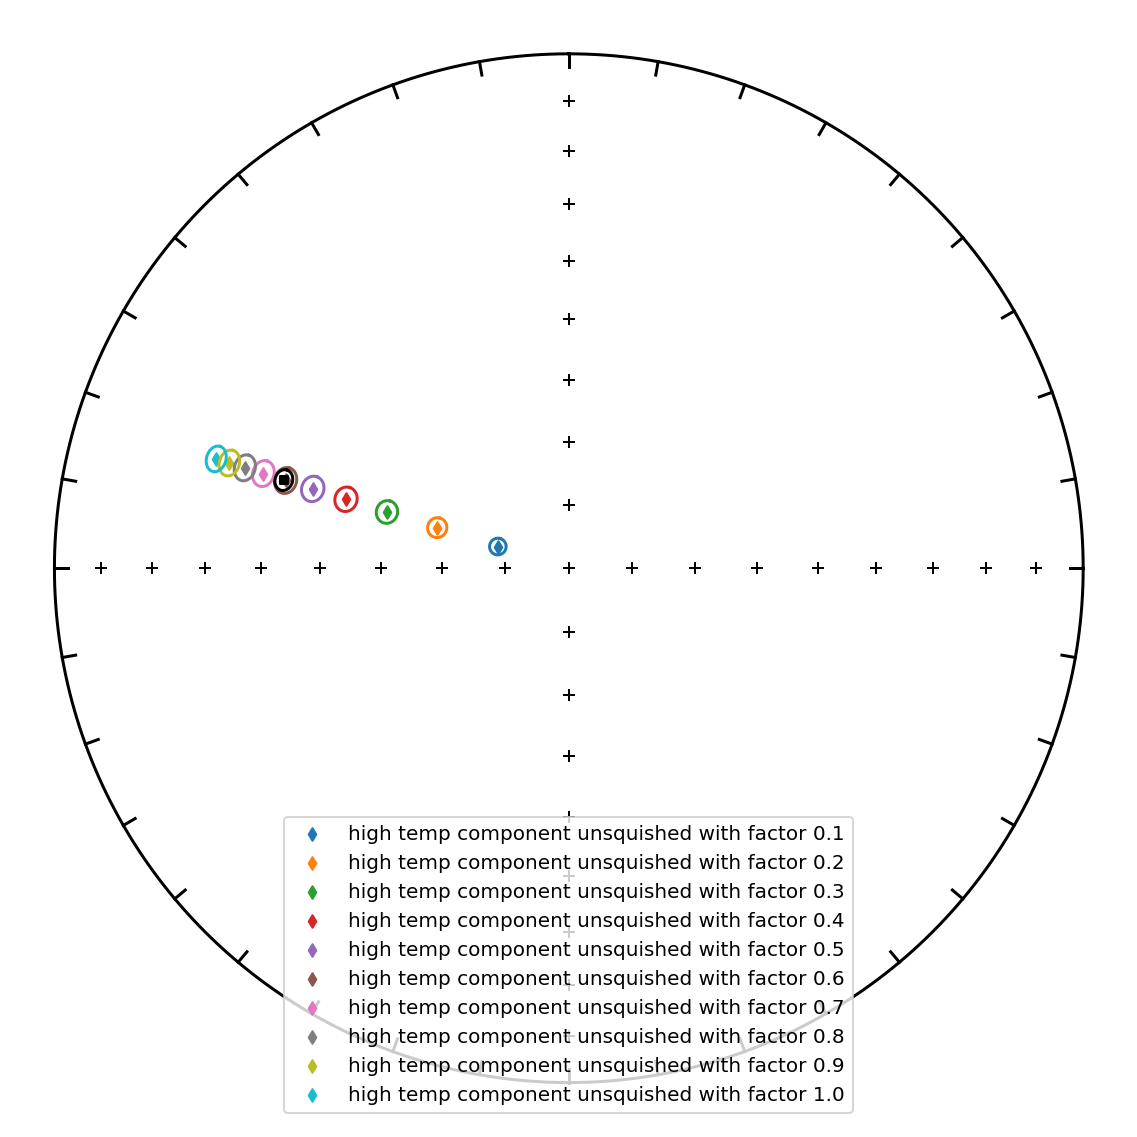

In [33]:
CF_undquished_mean_list = unsquish_factors(specimens_ht_tc['dir_dec'].tolist(), specimens_ht_tc['dir_inc'].tolist(), n=10) 
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='black', marker = 's', label='mid temp component (tilt-corrected)')

## plot everything as poles

<Figure size 360x360 with 0 Axes>

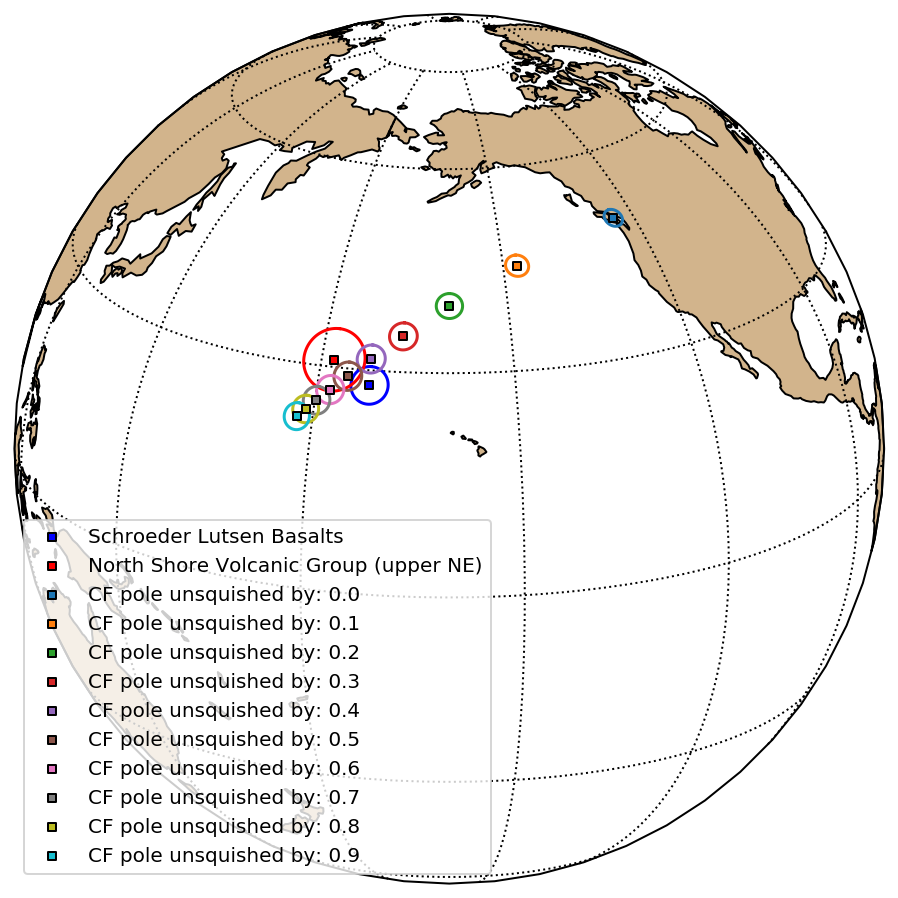

In [34]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

## Plot theoretical expected inclination vs observed inclination

In [35]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [36]:
NE_NSVG_inc = 41.4

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)
nsvg_f_2 = ipmag.squish(NE_NSVG_inc,.2)
nsvg_f_1 = ipmag.squish(NE_NSVG_inc,.1)

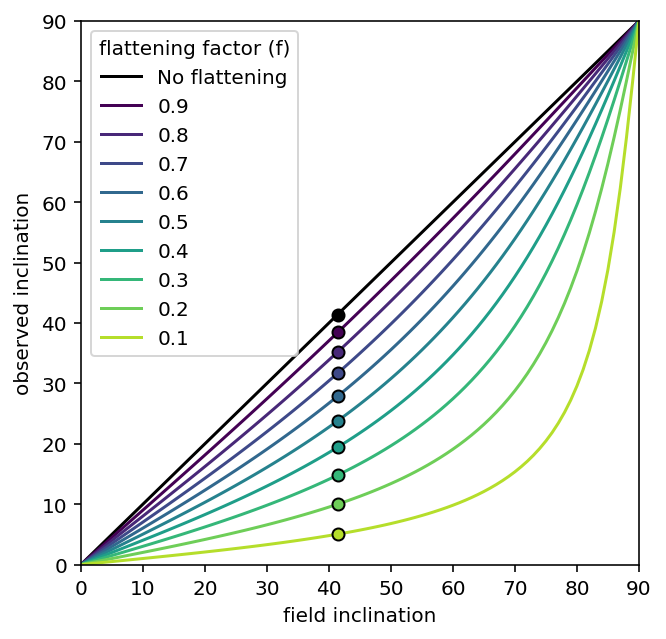

In [37]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_2, label='0.2', color=viridis(7))
plt.scatter(NE_NSVG_inc,nsvg_f_2,color=viridis(7),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_1, label='0.1', color=viridis(8))
plt.scatter(NE_NSVG_inc,nsvg_f_1,color=viridis(8),edgecolors='black',zorder=100)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('../code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

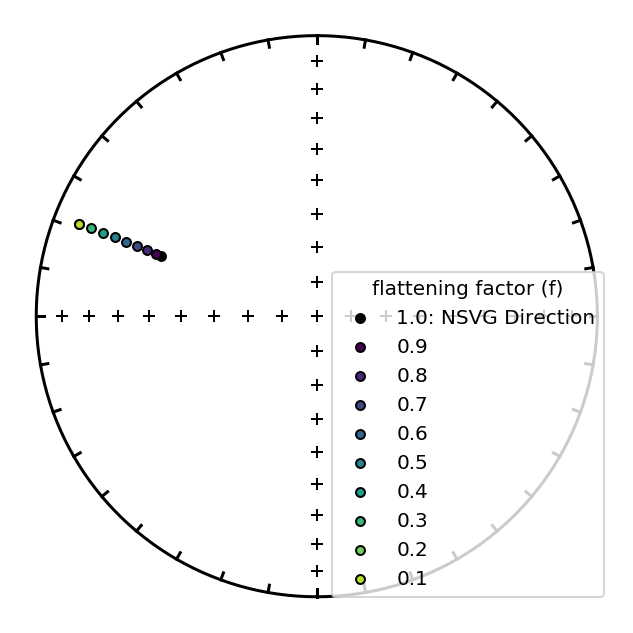

In [39]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(7), label='0.2',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(8), label='0.1',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
upper_nsvg_shallowing.savefig('../code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

# Determining the range of flattening factors consistent with common ht and mt means using the Watson common mean test

In [36]:
saved_angles_mt=(np.loadtxt('Watson_mean_test_output/good_angles_mt.txt')).tolist()
index_angle_mt=saved_angles_mt.index(min(saved_angles_mt))
saved_f_factors_mt=(np.loadtxt('Watson_mean_test_output/good_f_factors_mt.txt')).tolist()
best_f_mt=round(saved_f_factors_mt[index_angle_mt], 3)

In [38]:
print('The smallest angle between data sets is',round(min(saved_angles_mt),3), 'which corresponds to an f factor of', best_f_mt,'.')

The smallest angle between data sets is 0.025 which corresponds to an f factor of 0.607 .


# conduct a Watson common mean test between the NSVG and CF sandstone directions

In [82]:
saved_angles_nsvg=(np.loadtxt('Watson_mean_test_output/good_angles_nsvg.txt')).tolist()
index_angle_nsvg=saved_angles_nsvg.index(min(saved_angles_nsvg))
saved_f_factors_nsvg=(np.loadtxt('Watson_mean_test_output/good_f_factors_nsvg.txt')).tolist()
best_f_nsvg=round(saved_f_factors_nsvg[index_angle_nsvg], 2)

In [83]:
print('The smallest angle between data sets is',round(min(saved_angles_nsvg),3), 'which corresponds to an f factor of', best_f_nsvg,'.')

The smallest angle between data sets is 3.138 which corresponds to an f factor of 0.64 .


In [84]:
saved_nsvg_angles=np.loadtxt('Watson_mean_test_output/good_angles_nsvg.txt')
saved_f_factors_nsvg=np.loadtxt('Watson_mean_test_output/good_f_factors_nsvg.txt')

In [85]:
saved_angles_all=np.loadtxt('Watson_mean_test_output/all_angles.txt')
saved_factors_all=np.loadtxt('Watson_mean_test_output/all_factors.txt')

In [86]:
all_factors_mt=np.loadtxt("Watson_mean_test_output/all_factors_mt.txt")
all_angles_mt=np.loadtxt("Watson_mean_test_output/all_angles_mt.txt")

In [87]:
some_factors_mt=np.loadtxt("Watson_mean_test_output/some_factors_mt.txt")
some_angles_mt=np.loadtxt("Watson_mean_test_output/some_angles_mt.txt")

In [59]:
NSVG_Data=pd.read_csv('../../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()


nneu_dirs = ipmag.make_di_block(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_dir_mean=pmag.fisher_mean(nneu_dirs)

In [62]:
mt_tc_di_block = ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())

In [56]:
mt_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           2.8
Critical value of V:  6.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.402632503993828, 5.068181417391994)

In [57]:
e_i_corrected_incs=ipmag.unsquish(specimens_ht_tc['dir_inc'],0.684999)
ei_corrected_block=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),e_i_corrected_incs.tolist())
ipmag.common_mean_watson(ei_corrected_block,nneu_dirs)

Results of Watson V test: 

Watson's V:           3.1
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.7
Critical angle for M&M1990:   5.2
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.677119019771982, 5.240948103591239)

In [58]:
ht_mt_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.607)
emp_mt_corrected_directions=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_mt_incs_watson_unsquish.tolist())
ipmag.common_mean_watson(emp_mt_corrected_directions,nneu_dirs)

Results of Watson V test: 

Watson's V:           2.6
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.2
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.3841642332096358, 5.242365621550129)

In [59]:
ei_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           2.8
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.0
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.402632503993828, 5.068181417391994)

# comparing e/i method to the empirically derived factor

In [60]:
def elongation_calc(di_block):
    princ_comps = pmag.doprinc(di_block)
    elongation = princ_comps['tau2']/princ_comps['tau3']
    return elongation

def elongation_bootstrap(di_block, nb=1000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(di_block)
        pseudo_elong = elongation_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(np.absolute(mean['inc']))
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elongation_calc(di_block), 4)
    mean = pmag.fisher_mean(di_block)
    inc = np.absolute(mean['inc'])
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high]
#     print(elong, low, high, inc, inc_low, inc_high)
    
xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

In [63]:
ht_unsquished_incs = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(),best_f_nsvg)
ht_di_block_f_corrected = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_unsquished_incs)

mt_elong, mt_inc = elongation_bootstrap(mt_tc_di_block)
ht_elong, ht_inc = elongation_bootstrap(ht_tc_di_block)
ht_elong_ei, ht_inc_ei = elongation_bootstrap(ht_tc_ei_corrected)
ht_elong_f, ht_inc_f = elongation_bootstrap(ht_di_block_f_corrected)

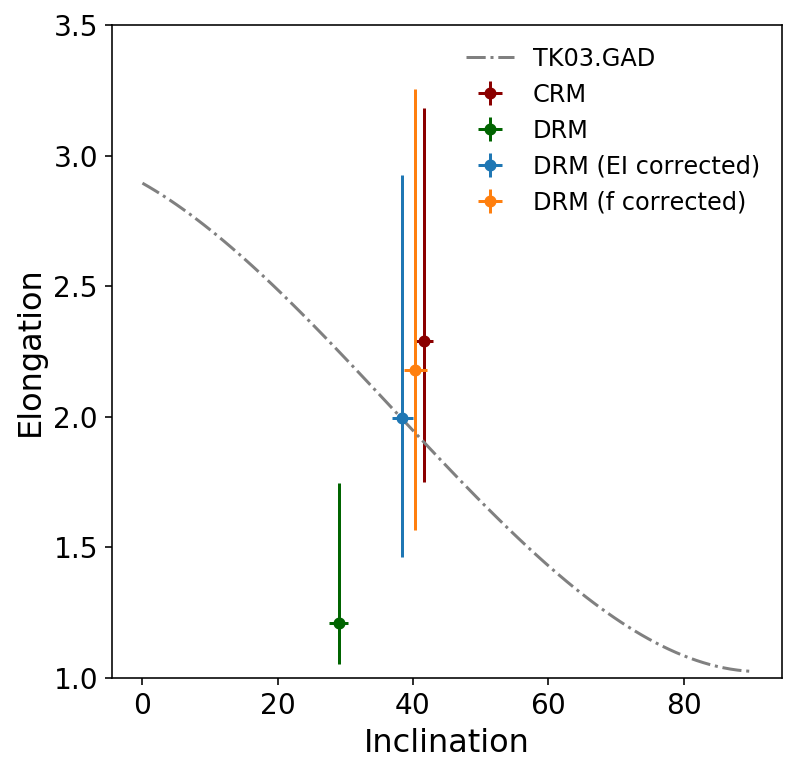

In [65]:
tk03_curve=plt.figure(figsize=(6,6))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD',linestyle='-.')
plt.ylim(1,3.5)
plt.errorbar(mt_inc[0], mt_elong[0], yerr=[[mt_elong[0]-mt_elong[1]],[mt_elong[2]-mt_elong[0]]], 
             xerr=[[mt_inc[0]-mt_inc[1]],[mt_inc[2]-mt_inc[0]]], fmt='o', ms=5,color='darkred', label='CRM')
plt.errorbar(ht_inc[0], ht_elong[0], yerr=[[ht_elong[0]-ht_elong[1]],[ht_elong[2]-ht_elong[0]]], 
             xerr=[[ht_inc[0]-ht_inc[1]],[ht_inc[2]-ht_inc[0]]], fmt='o', ms=5,color='darkgreen', label='DRM')
plt.errorbar(ht_inc_ei[0], ht_elong_ei[0], yerr=[[ht_elong_ei[0]-ht_elong_ei[1]],[ht_elong_ei[2]-ht_elong_ei[0]]], 
             xerr=[[ht_inc_ei[0]-ht_inc_ei[1]],[ht_inc_ei[2]-ht_inc_ei[0]]], fmt='o', ms=5,color='C0', label='corrected DRM\n($E/I$ method)')
plt.errorbar(ht_inc_f[0], ht_elong_f[0], yerr=[[ht_elong_f[0]-ht_elong_f[1]],[ht_elong_f[2]-ht_elong_f[0]]], 
             xerr=[[ht_inc_f[0]-ht_inc_f[1]],[ht_inc_f[2]-ht_inc_f[0]]], fmt='o', ms=5,color='C1', label='corrected DRM\n( corrected)')
plt.ylabel('Elongation', fontsize=16)
plt.xlabel('Inclination', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, frameon=0, fontsize=12)
tk03_curve.savefig('../code_output/tk03_curve.pdf', bbox_inches='tight')
plt.show()

In [68]:
#best_f_nsvg
#f_factor_ht_mt
#f_factor_ht_NSVG
Cutface_lat = 47.73055
Cutface_lon = -90.44128
e_i_corrected_incs=ipmag.unsquish(specimens_ht_tc['dir_inc'],0.684999)
ht_mt_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.607)
ht_nsvg_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.635)

In [69]:
e_i_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),e_i_corrected_incs.tolist())
emp_mt_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_mt_incs_watson_unsquish.tolist())
emp_nsvg_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_nsvg_incs_watson_unsquish.tolist())
print(e_i_corrected_mean_directions)
print(emp_mt_corrected_mean_directions)
print(emp_nsvg_corrected_mean_directions)

{'dec': 287.21451677030257, 'inc': 38.40110872716916, 'n': 152, 'r': 148.05576109164735, 'k': 38.28368501721079, 'alpha95': 1.8721753020989942, 'csd': 13.09116062873327}
{'dec': 287.21009145760206, 'inc': 41.58835392933117, 'n': 152, 'r': 148.00181740684715, 'k': 37.76715957360164, 'alpha95': 1.8852789568829134, 'csd': 13.180377747773854}
{'dec': 287.2117217324296, 'inc': 40.393721797591496, 'n': 152, 'r': 148.01674308199543, 'k': 37.9086770219291, 'alpha95': 1.8816614811352819, 'csd': 13.155752811851665}


In [70]:
e_i_corrected_vgp=pmag.dia_vgp(e_i_corrected_mean_directions['dec'],e_i_corrected_mean_directions['inc'],1.7756643774953274,Cutface_lat,Cutface_lon)
emp_mt_corrected_vgp=pmag.dia_vgp(emp_mt_corrected_mean_directions['dec'],emp_mt_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)
emp_nsvg_corrected_vgp=pmag.dia_vgp(emp_nsvg_corrected_mean_directions['dec'],emp_nsvg_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)



<Figure size 504x504 with 0 Axes>

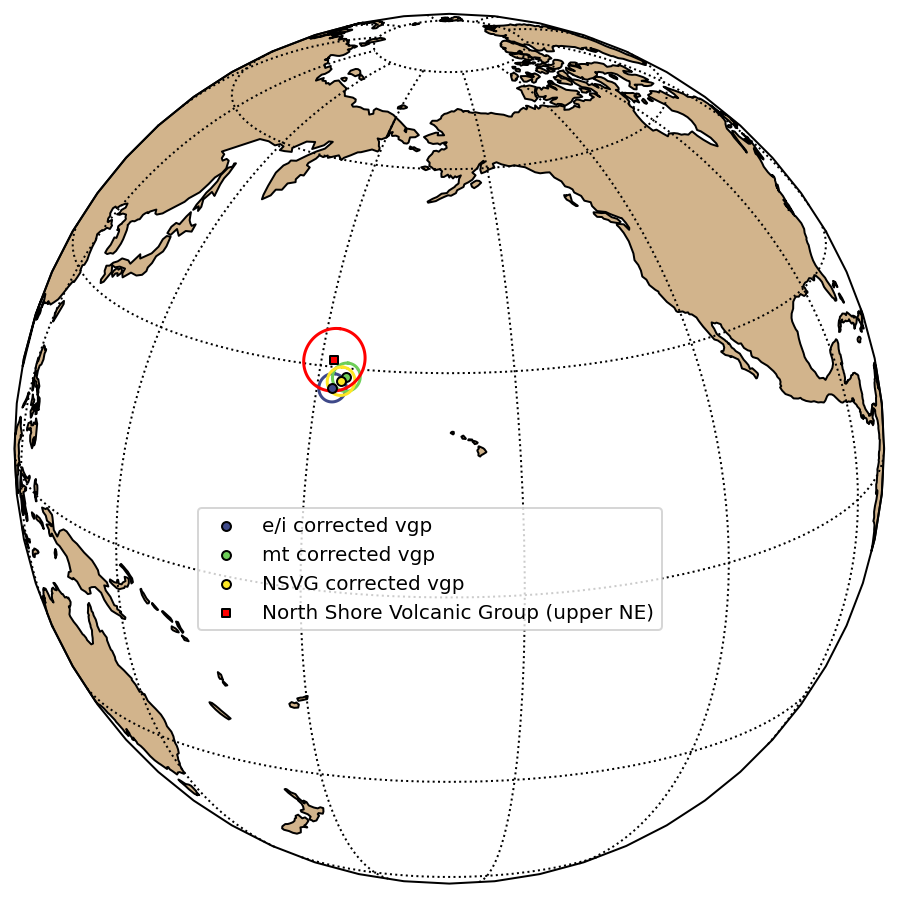

In [71]:
vgp_mt_ei=plt.figure(figsize=(7, 7))
map_axis_vgp=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis_vgp,e_i_corrected_vgp[0],e_i_corrected_vgp[1],e_i_corrected_mean_directions['alpha95'],color=viridis(2),label='e/i corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_mt_corrected_vgp[0],emp_mt_corrected_vgp[1],emp_mt_corrected_mean_directions['alpha95'],color=viridis(7),label='mt corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_nsvg_corrected_vgp[0],emp_nsvg_corrected_vgp[1],emp_nsvg_corrected_mean_directions['alpha95'],color=viridis(9),label='NSVG corrected vgp')


ipmag.plot_pole(map_axis_vgp,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

plt.legend(loc=3,bbox_to_anchor=(.2,.28))
plt.savefig('../code_output/vgp_mt_ei.pdf',bbox='tight')

plt.show()

## Difference in shallowing as a function of grain size

In [57]:
cf_grain_sizes=pd.read_csv('../../data/Pmag/cf_specimen_lithologies.csv')
cf_specimens_directions_and_grain=pd.merge(cf_grain_sizes,Cutface_specimens,on='specimen')

In [58]:
cf_fm_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>=3) & 
                                                  (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                  (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

cf_vfs_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']==2) & 
                                               (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                               (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

cf_silt_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<=1) & 
                                                (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

### fine to medium grained specimens

In [59]:
cf_fm_grain_mean=ipmag.fisher_mean(cf_fm_grain['dir_dec'].tolist(),cf_fm_grain['dir_inc'].tolist())
cf_fm_grain_mean

{'dec': 285.8802036811143,
 'inc': 32.64879395708542,
 'n': 56,
 'r': 54.32735738545677,
 'k': 32.88209897427467,
 'alpha95': 3.364364812736884,
 'csd': 14.125546292906932}

### very fine grained specimens

In [60]:
cf_vfs_grain_mean=ipmag.fisher_mean(cf_vfs_grain['dir_dec'].tolist(),cf_vfs_grain['dir_inc'].tolist())
cf_vfs_grain_mean

{'dec': 286.2520408698588,
 'inc': 29.85140462002685,
 'n': 41,
 'r': 39.91030329326937,
 'k': 36.70746158351745,
 'alpha95': 3.7344659218800533,
 'csd': 13.369274562274919}

### silt and clay

In [61]:
cf_silt_grain_mean=ipmag.fisher_mean(cf_silt_grain['dir_dec'].tolist(),cf_silt_grain['dir_inc'].tolist())
cf_silt_grain_mean

{'dec': 287.39599196618065,
 'inc': 26.154447834080703,
 'n': 60,
 'r': 58.592540354575135,
 'k': 41.91949672716185,
 'alpha95': 2.8664303395983954,
 'csd': 12.510566878478787}

## do rip ups affect the inclination??

In [62]:
cf_no_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'n') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_no_rip_ups_mean=ipmag.fisher_mean(cf_no_rip_ups['dir_dec'].tolist(),cf_no_rip_ups['dir_inc'].tolist())
cf_no_rip_ups_mean

{'dec': 286.2651552185065,
 'inc': 29.057694337996054,
 'n': 146,
 'r': 141.85592261127525,
 'k': 34.98969406182361,
 'alpha95': 2.001079811780064,
 'csd': 13.69351513961189}

In [63]:
cf_yes_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'y') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_yes_rip_ups_mean=ipmag.fisher_mean(cf_yes_rip_ups['dir_dec'].tolist(),cf_yes_rip_ups['dir_inc'].tolist())
cf_yes_rip_ups_mean

{'dec': 290.88710005780604,
 'inc': 34.23687362466882,
 'n': 11,
 'r': 10.848500034188547,
 'k': 66.00661555557926,
 'alpha95': 5.661406899635496,
 'csd': 9.96991111138382}

## Below we show that there is minimal stgrtigraphic bias of inclination shallowing in Cut Face

In [69]:
strat_heights=pd.read_csv('../../data/specimen_strat_height_new.csv',header=0)
specimens_w_strat_heights=pd.merge(specimens_ht_tc,strat_heights, on='specimen')

specimens_above_68_meters=specimens_w_strat_heights[specimens_w_strat_heights['strat_level']>68]
specimens_below_68_meters=specimens_w_strat_heights[specimens_w_strat_heights['strat_level']<68]

In [70]:
mean_above_68_meters = ipmag.fisher_mean(specimens_above_68_meters['dir_dec'].tolist(),specimens_above_68_meters['dir_inc'].tolist())
mean_above_68_meters

{'dec': 288.6872294044219,
 'inc': 29.397291005180204,
 'n': 30,
 'r': 29.372164239278163,
 'k': 46.190424015761785,
 'alpha95': 3.9087844396735054,
 'csd': 11.918155414579386}

In [71]:
mean_below_68_meters = ipmag.fisher_mean(specimens_below_68_meters['dir_dec'].tolist(),specimens_below_68_meters['dir_inc'].tolist())
mean_below_68_meters

{'dec': 286.1343594246629,
 'inc': 29.304117067219348,
 'n': 124,
 'r': 120.40982825509072,
 'k': 34.26019943876193,
 'alpha95': 2.1970480868212974,
 'csd': 13.838533693398727}

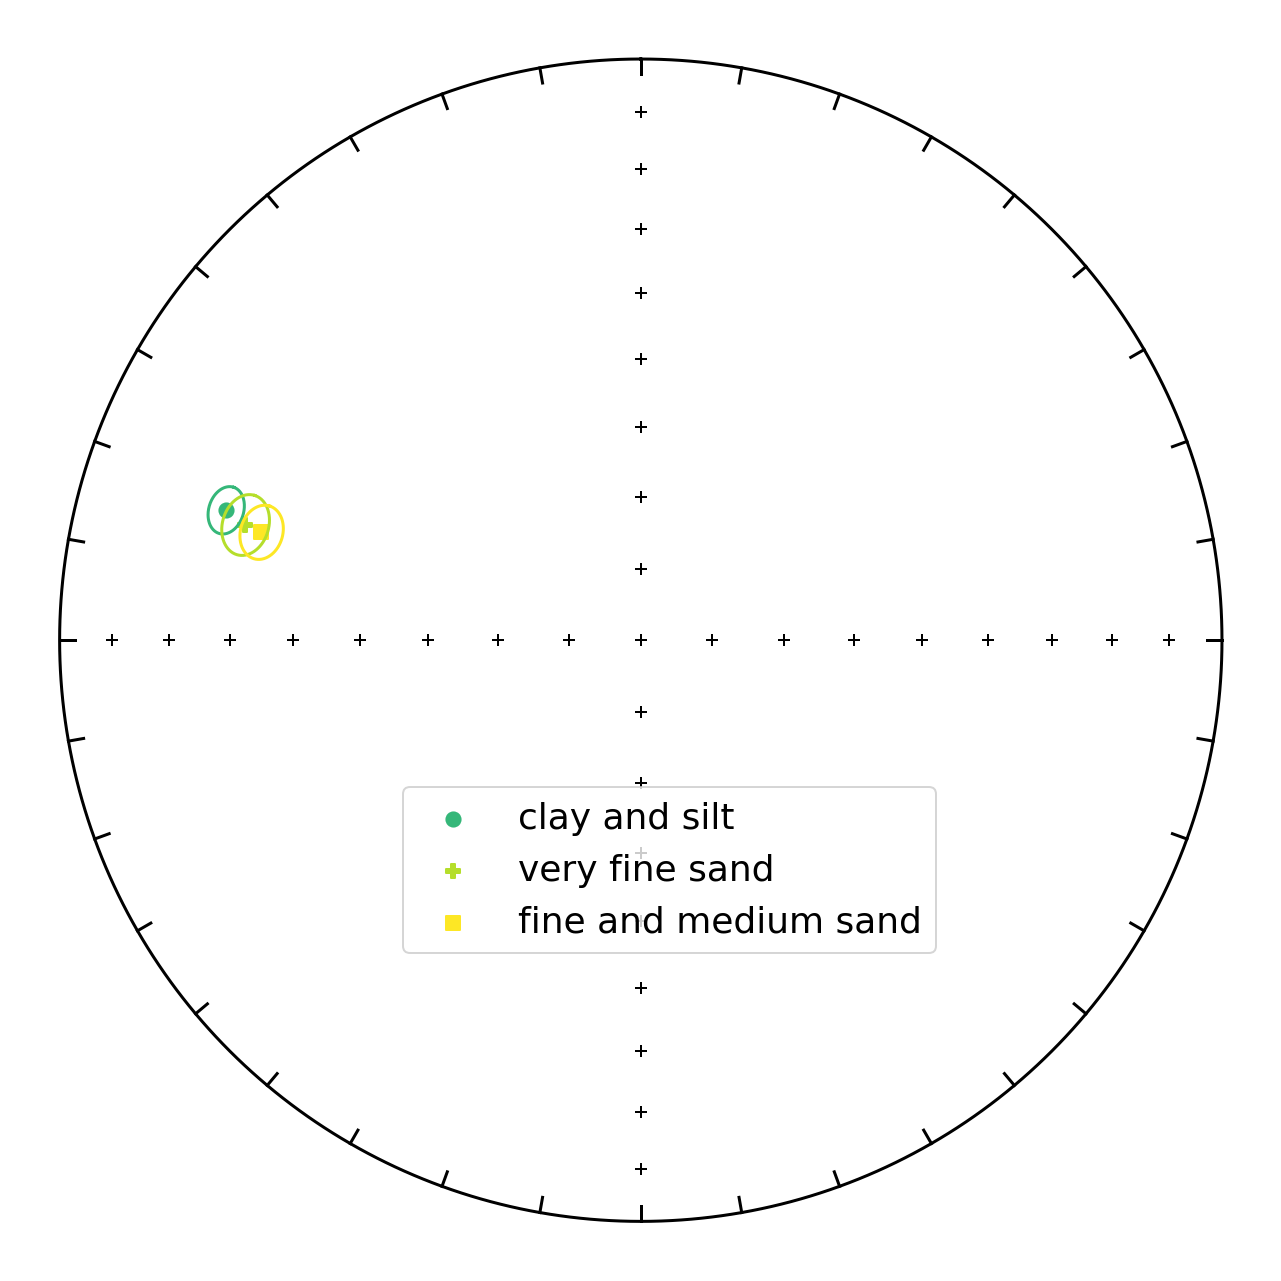

In [80]:
grain_size_stereonet=plt.figure(num=fignum,figsize=(9,9))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(cf_silt_grain_mean['dec'],cf_silt_grain_mean['inc'],cf_silt_grain_mean['alpha95'],color= viridis(6),label='clay and silt',marker='o',markersize=50)
ipmag.plot_di_mean(cf_vfs_grain_mean['dec'],cf_vfs_grain_mean['inc'],cf_vfs_grain_mean['alpha95'],color=viridis(8), label='very fine sand',marker='P',markersize=50)
ipmag.plot_di_mean(cf_fm_grain_mean['dec'],cf_fm_grain_mean['inc'],cf_fm_grain_mean['alpha95'],color=viridis(10),label='fine and medium sand',marker='s',markersize=50)

plt.legend(loc=[.31,.25],fontsize=18)
grain_size_stereonet.savefig('../code_output/grain_size_stereonet.pdf', bbox_inches='tight',transparent=True)                   
plt.show()

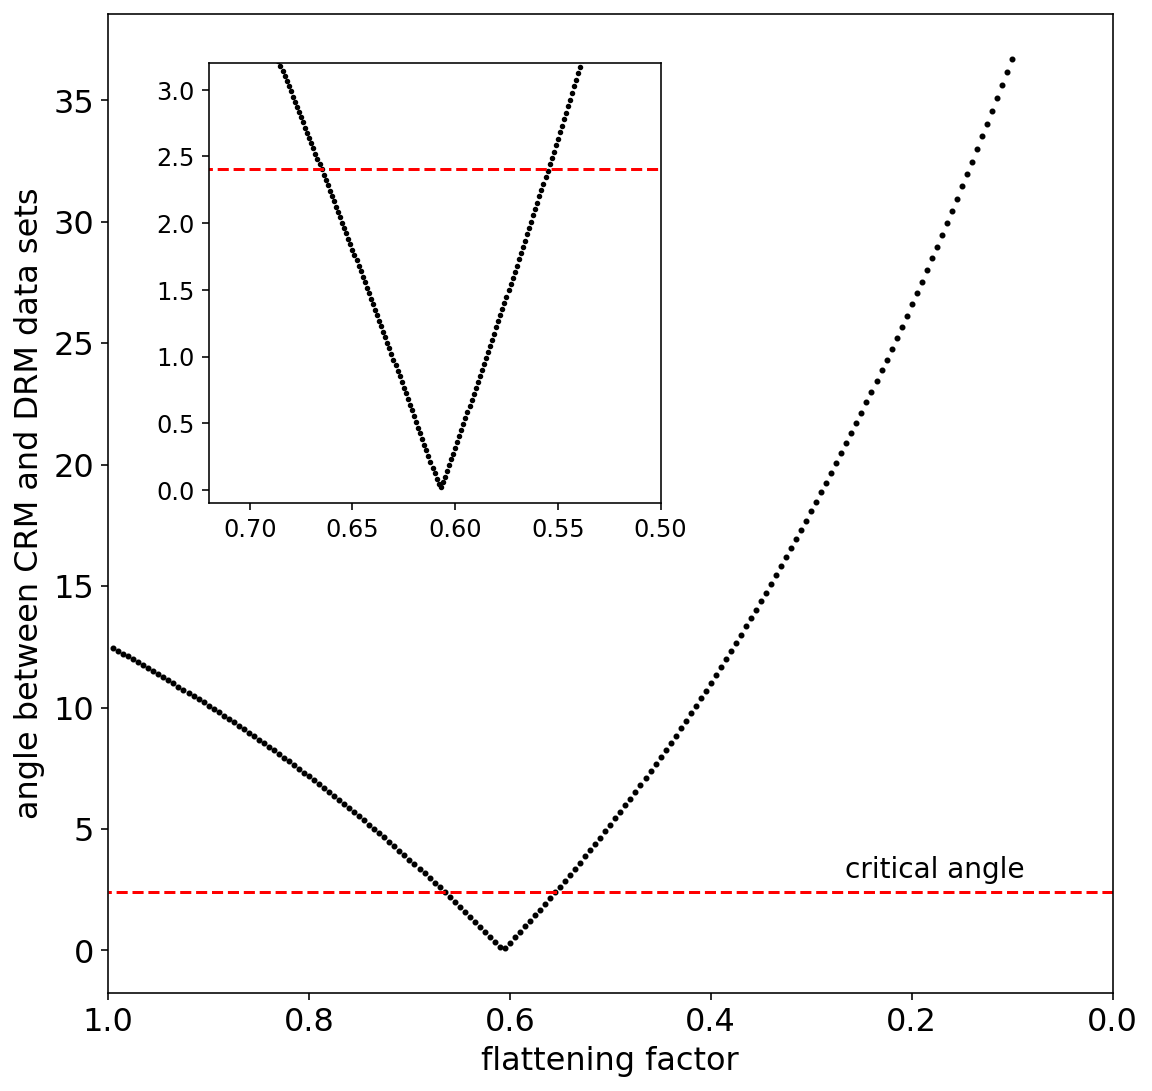

In [89]:
fig,inset=plt.subplots(figsize=(9,9))
inset.scatter(all_factors_mt,all_angles_mt,s=4,color='black')

x_crit=[0,1]
x_crit_inset=[.3,.9]
y_crit=[max(saved_angles_mt),max(saved_angles_mt)]
plt.plot(x_crit,y_crit,color='red',ls='--',label='critical angle')

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(some_factors_mt,some_angles_mt,s=3,color='black')
fig_inset.tick_params(labelsize=12)
fig_inset.invert_xaxis()
fig_inset.plot(x_crit_inset,y_crit,color='red',ls='--',label='critical angle')
fig_inset.set_xlim(.72,.5)
fig_inset.set_ylim(-.1,3.2)

plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between CRM and DRM data sets',fontsize=16)

plt.legend(loc=[.7,.1], fontsize=14, frameon=False,handlelength=0)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)

# plt.savefig('../code_output/angle_vs_f_MT.pdf',bbox_inches='tight',transparent=True)

plt.show()

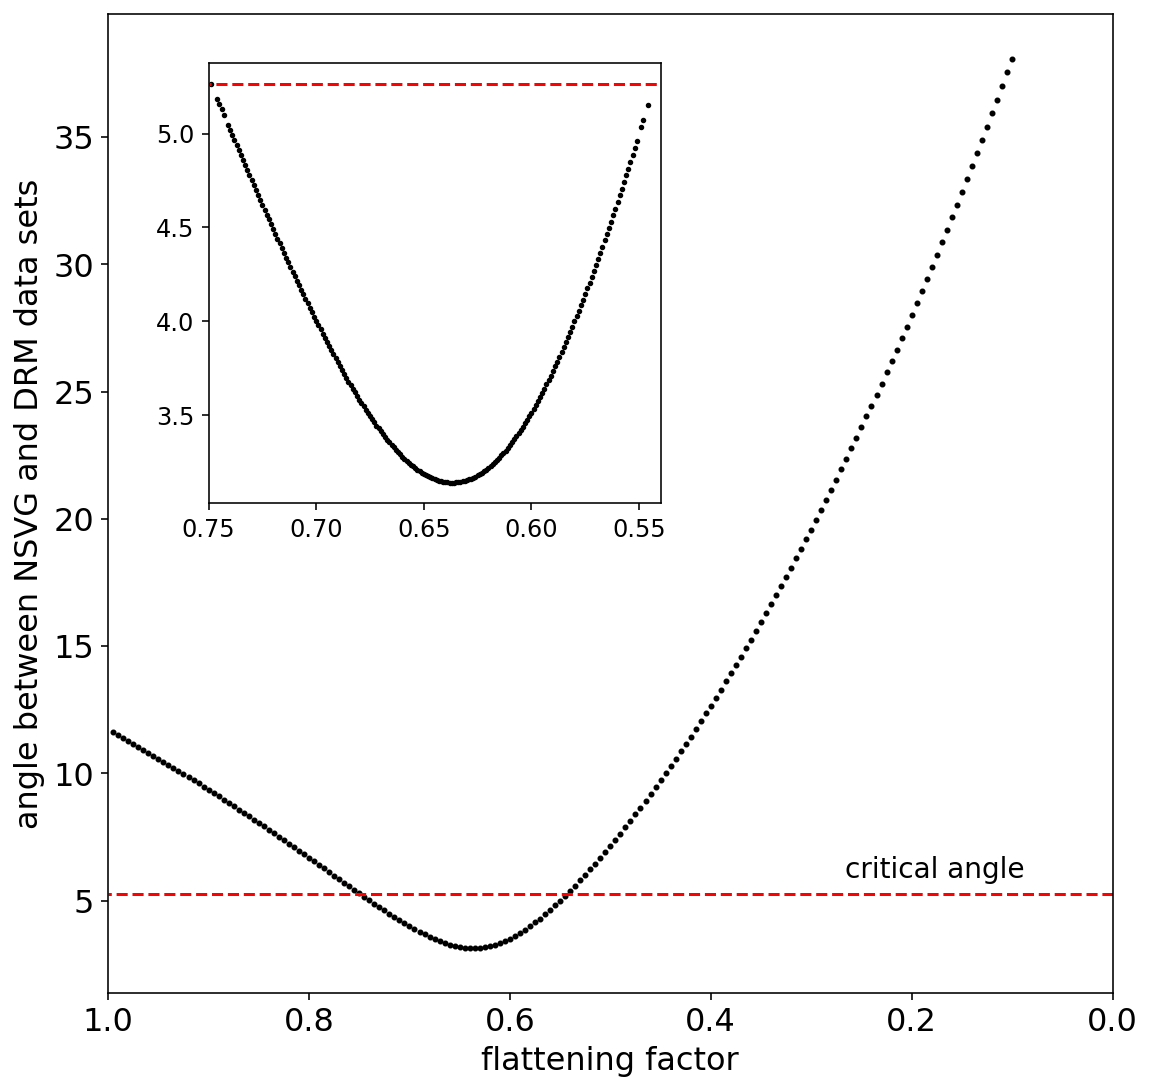

In [104]:
fig,inset=plt.subplots(figsize=(9,9))
plt.scatter(saved_factors_all,saved_angles_all,s=4,color='black')

x_crit=[0,1]
x_crit_inset=[0.52,0.75]
y_crit=[max(saved_nsvg_angles),max(saved_nsvg_angles)]
plt.plot(x_crit,y_crit,color='red',ls='--',label='critical angle')

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(saved_f_factors_nsvg,saved_nsvg_angles,s=3,color='black')
fig_inset.plot(x_crit_inset,y_crit,color='red',ls='--',label='critical angle')
fig_inset.tick_params(labelsize=12)
fig_inset.set_xlim(.75,.54)
fig_inset.set_ylim(3,)
# fig_inset.invert_xaxis()
plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between NSVG and DRM data sets',fontsize=16)

plt.legend(loc=[.7,.1], fontsize=14,frameon=False,handlelength=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)

plt.savefig('../code_output/angle_vs_f_NSVG.pdf',bbox_inches='tight',transparent=True)

plt.show()

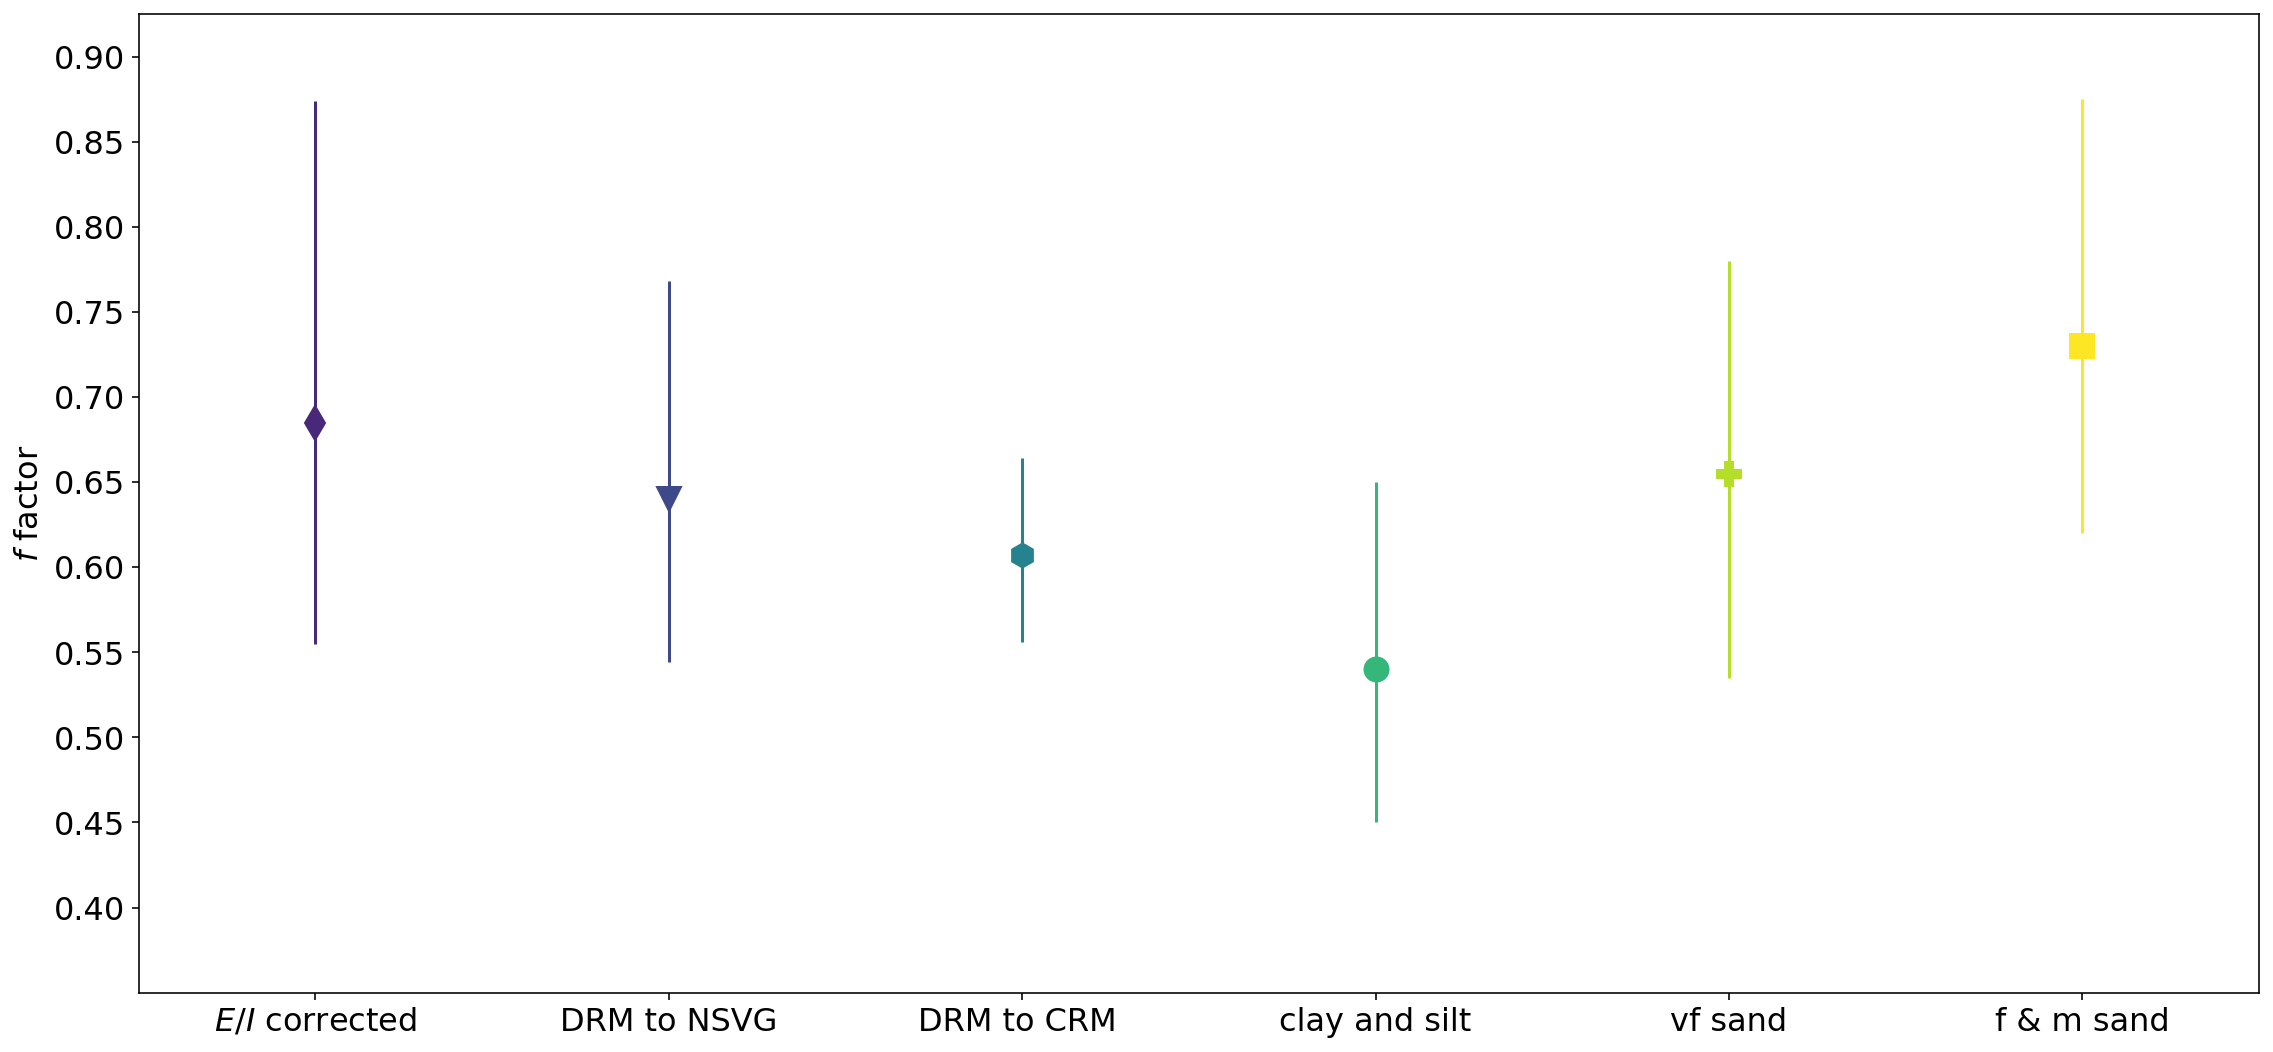

In [106]:
summary_f_figure=plt.figure(figsize=(19,9))
plt.ylim(.35,.925)

final_f_ei=['$E/I$ corrected']
final_f_nsvg=['DRM to NSVG']
final_f=['DRM to CRM ']
clay_silt=['clay and silt']
vf_sand=['vf sand']
f_m_sand=['f & m sand']

tick_range=np.arange(.40,.95,.05)

plt.yticks(tick_range,fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$f$ factor',fontsize=16)

plt.margins(x=.1)

plt.errorbar(final_f_ei,0.685, yerr=[[.13],[.189]],marker='d',markersize='12',color= viridis(1))
plt.errorbar(final_f_nsvg,best_f_nsvg, yerr=[[.096],[.128]],marker='v',markersize='12',color= viridis(2))
plt.errorbar(final_f,best_f_mt, yerr=[[.051],[.057]],marker='h',markersize='12',color= viridis(4))
plt.errorbar(clay_silt,0.54,yerr=[[.09],[.11]],marker='o',markersize='12',color= viridis(6))
plt.errorbar(vf_sand,0.655,yerr=[[.12],[.125]],marker='P',markersize='12',color= viridis(8))
plt.errorbar(f_m_sand,0.73,yerr=[[0.11],[0.145]],marker='s',markersize='12',color= viridis(10))

plt.savefig('../code_output/summary_f_figure.pdf',bbox_inches='tight',transparent=True)

plt.show()